# Data Exploration

In this notebook the data exploration steps are described.

## Install dependencies

In [52]:
%pip install pandas
%pip install SQLAlchemy==1.4.46

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load data

In [53]:
import pandas as pd
from sqlalchemy import create_engine
import warnings

pd.set_option('display.max_columns', 10)
db_path = '../data/project.sqlite'
engine = create_engine(f'sqlite:///{db_path}')

wage_gap_df = pd.read_sql('SELECT * FROM wage_gap', con=engine)
graduate_df = pd.read_sql('SELECT * FROM graduate_field', con=engine)

pd.set_option('display.max_columns', 30)
warnings.filterwarnings("ignore")

## First Dataset: Wage Gap
### Look at the first rows

In [54]:
wage_gap_df.head(10)

LOCATION  TIME   WAGE GAP
0      AUS  1975  21.582734
1      AUS  1976  20.754717
2      AUS  1977  18.390805
3      AUS  1978  19.791667
4      AUS  1979  20.000000
5      AUS  1980  18.750000
6      AUS  1981  18.253968
7      AUS  1982  20.819113
8      AUS  1983  19.155844
9      AUS  1984  18.674699

In [55]:
graduate_df.head(10)

Country Code Country Name  \
0          CAN       Canada   
1          CAN       Canada   
2          CAN       Canada   
3          CAN       Canada   
4          CAN       Canada   
5          CAN       Canada   
6          CAN       Canada   
7          CAN       Canada   
8          CAN       Canada   
9          CAN       Canada   

                                    Graduation Field  Year  Female Share  
0  Science, Technology, Engineering and Mathemati...  1998      30.62064  
1    Agriculture, Forestry, Fisheries and Veterinary  1998      48.55266  
2                                Arts and Humanities  1998      62.24404  
3                   Business, Administration and Law  1998      55.14815  
4                                          Education  1998      74.47206  
5        Engineering, Manufacturing and Construction  1998      21.66536  
6                                 Health and Welfare  1998      78.43750  
7         Information and Communication Technologies  1998      24.32652  
8       Natural Sciences, Mathematics and Statistics  1998      50.16706  
9                                           Services  1998      58.41141

### Data exploration
Print some basic information about the data.

In [56]:
wage_gap_df.shape

(821, 3)

In [57]:
graduate_df.shape

(6837, 5)

In [58]:
wage_gap_df.groupby("LOCATION").agg({"LOCATION":'count'})

LOCATION
LOCATION          
ARG              5
AUS             47
AUT             22
BEL             22
BGR              7
BRA             11
CAN             26
CHE             13
CHL             11
COL             16
CRI             13
CYP              9
CZE             25
DEU             30
DNK             20
ESP              8
EST              9
FIN             43
FRA              8
GBR             53
GRC              8
HRV              5
HUN             30
IRL              8
ISL              8
ISR             21
ITA              8
JPN             48
KOR             32
LTU              9
LUX              4
LVA              9
MEX             16
MLT              5
NLD              9
NOR             26
NZL             34
POL             20
PRT              8
ROU              8
SVK             21
SVN              5
SWE             27
TUR              4
USA             50

In [59]:
wage_gap_df.describe()

TIME    WAGE GAP
count   821.000000  821.000000
mean   2006.699147   17.717762
std      11.750075    9.942611
min    1970.000000    0.384387
25%    2000.000000   10.172061
50%    2009.000000   16.310424
75%    2016.000000   21.984813
max    2022.000000   52.776236

In [60]:
wage_gap_mean =  wage_gap_df.groupby("LOCATION").agg({"WAGE GAP":'mean'})
wage_gap_mean

WAGE GAP
LOCATION           
ARG        8.693651
AUS       15.982432
AUT       18.773888
BEL        8.095169
BGR        4.915200
BRA       12.256302
CAN       20.691406
CHE       20.063059
CHL        9.968727
COL       10.182435
CRI        7.520497
CYP       20.696832
CZE       15.839493
DEU       18.052085
DNK        7.786976
ESP       10.908895
EST       23.933255
FIN       21.192092
FRA       11.113612
GBR       28.277105
GRC       10.634693
HRV        6.802174
HUN        9.703629
IRL       11.629981
ISL       16.199695
ISR       22.296589
ITA        7.521326
JPN       34.149748
KOR       39.330812
LTU       12.164238
LUX        7.687920
LVA       19.910619
MEX       15.188360
MLT        9.629509
NLD       14.687860
NOR        7.357518
NZL       10.185992
POL       14.563179
PRT       14.129982
ROU        6.768455
SVK       15.872678
SVN        6.019761
SWE       10.005608
TUR        5.793652
USA       25.729288

In [61]:
graduate_df.head(10)

Country Code Country Name  \
0          CAN       Canada   
1          CAN       Canada   
2          CAN       Canada   
3          CAN       Canada   
4          CAN       Canada   
5          CAN       Canada   
6          CAN       Canada   
7          CAN       Canada   
8          CAN       Canada   
9          CAN       Canada   

                                    Graduation Field  Year  Female Share  
0  Science, Technology, Engineering and Mathemati...  1998      30.62064  
1    Agriculture, Forestry, Fisheries and Veterinary  1998      48.55266  
2                                Arts and Humanities  1998      62.24404  
3                   Business, Administration and Law  1998      55.14815  
4                                          Education  1998      74.47206  
5        Engineering, Manufacturing and Construction  1998      21.66536  
6                                 Health and Welfare  1998      78.43750  
7         Information and Communication Technologies  1998      24.32652  
8       Natural Sciences, Mathematics and Statistics  1998      50.16706  
9                                           Services  1998      58.41141

In [62]:
graduate_df.describe()

Year  Female Share
count  6837.000000   6837.000000
mean   2008.411877     53.121258
std       5.508414     20.086986
min    1998.000000      0.000000
25%    2004.000000     36.446810
50%    2009.000000     55.409840
75%    2013.000000     69.298250
max    2018.000000    100.000000

In [63]:
graduate_df.groupby("Country Code").agg({"Year":'count', "Female Share":'mean'})

Year  Female Share
Country Code                    
ARG             63     58.644404
AUS            162     52.453761
AUT             44     53.477859
BEL            154     49.224677
BGR            197     57.245026
BRA            165     53.696228
CAN             85     54.636085
CHE            196     42.347326
CHL            137     48.380101
COL            126     50.981320
CRI            111     53.162057
CYP            173     56.093502
CZE            204     53.660159
DEU             77     46.771895
DNK            209     48.684218
ESP            209     52.309556
EST            209     61.555759
FIN            192     58.414986
FRA            151     52.017372
GBR            191     52.294901
GRC            121     56.129305
HRV            165     55.449631
HUN            198     53.667516
IRL            172     52.205488
ISL            140     56.039282
ISR             17     55.849031
ITA            186     53.014807
JPN             35     52.406277
KOR            201     48.119535
LTU            209     57.324558
LUX             56     48.045962
LVA            209     59.813937
MEX            184     50.077952
MLT            186     49.177102
NLD            152     49.438854
NOR            190     50.240571
NZL             66     53.937137
POL            108     61.631541
PRT            187     56.937804
ROU            170     55.888092
SVK            198     52.292662
SVN            187     54.461131
SWE            198     56.317509
TUR            159     43.267162
USA             88     51.262712

### Visualization and Data Transformation

We first visualise the distribution of the wage gap.

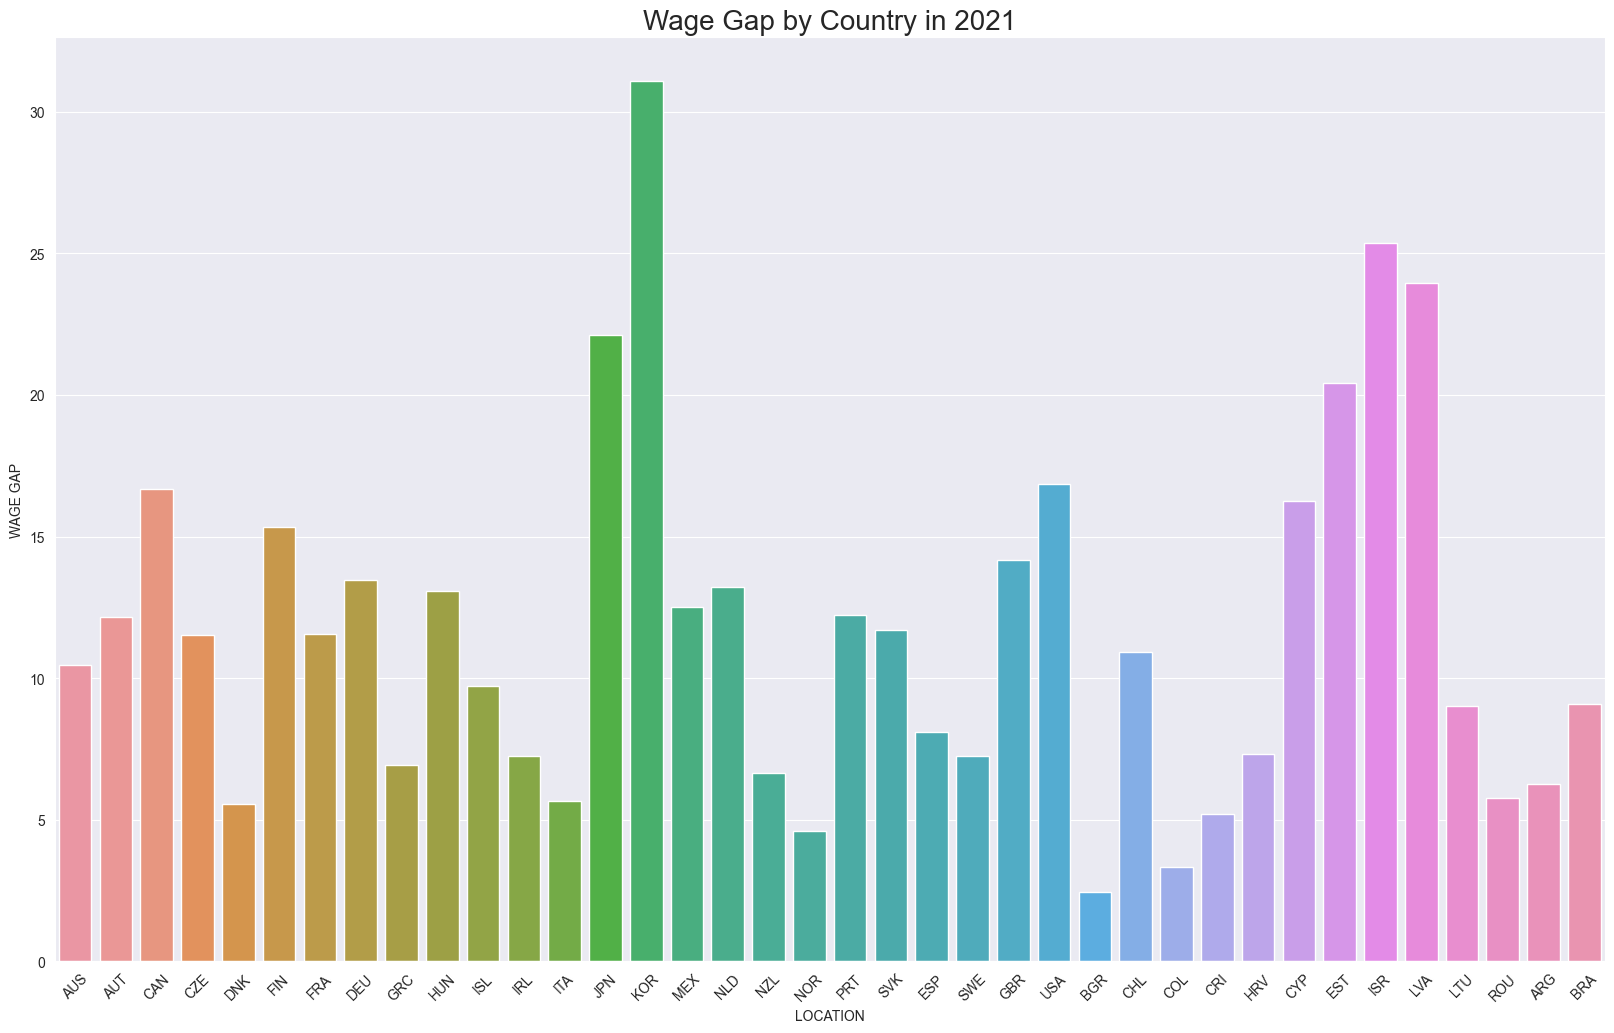

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

select_2021 = wage_gap_df[wage_gap_df["TIME"] == 2021]

plt.figure(figsize=(20, 12))
sns.barplot(data=select_2021, x="LOCATION", y="WAGE GAP")
plt.xticks(rotation=45)

plt.title("Wage Gap by Country in 2021", fontsize=20)
plt.show()

There may be some missing date.
Let's use pivot table and check the missing data.

In [65]:
wage_gap_df.pivot_table(index="LOCATION", columns="TIME", values="WAGE GAP", fill_value=0)

TIME           1970       1971       1972       1973       1974       1975  \
LOCATION                                                                     
ARG        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
AUS        0.000000   0.000000   0.000000   0.000000   0.000000  21.582734   
AUT        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
BEL        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
BGR        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
BRA        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CAN        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CHE        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CHL        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
COL        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CRI        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CYP        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CZE        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
DEU        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
DNK        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
ESP        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
EST        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
FIN        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
FRA        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
GBR       47.578039  45.527422  45.677795  46.378726  44.422234  39.855415   
GRC        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
HRV        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
HUN        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
IRL        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
ISL        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
ISR        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
ITA        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
JPN        0.000000   0.000000   0.000000   0.000000   0.000000  42.389758   
KOR        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
LTU        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
LUX        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
LVA        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
MEX        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
MLT        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
NLD        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
NOR        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
NZL        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
POL        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
PRT        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
ROU        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
SVK        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
SVN        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
SWE        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
TUR        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
USA        0.000000   0.000000   0.000000  38.110403  39.100684  37.630032   

TIME           1976       1977       1978       1979       1980       1981  \
LOCATION                                                                     
ARG        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
AUS       20.754717  18.390805  19.791667  20.000000  18.750000  18.253968   
AUT        0.000000  

Many missing data is observed.
    1. Year 2022 should be dropped to avoid bias (No reasonable way to fill in missing data)
    2. The whole scope should be limited to last 20years only

In [66]:
selected_wage_gap_df = wage_gap_df[wage_gap_df["TIME"] != 2022]
latest = selected_wage_gap_df["TIME"].max()
selected_years = latest - 20
selected_wage_gap_df = selected_wage_gap_df[selected_wage_gap_df["TIME"] >= selected_years]
selected_wage_gap_df.pivot_table(index="LOCATION", columns="TIME", values="WAGE GAP", fill_value=0)

TIME           2001       2002       2003       2004       2005       2006  \
LOCATION                                                                     
ARG        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
AUS       14.342105  15.000000  13.043478  14.352941  15.777778  16.666667   
AUT       22.801818  24.489224  21.136922  22.430792  22.032086  21.855130   
BEL       13.186813  11.604714  15.205184  11.832061  11.511093  10.253268   
BGR        0.000000  12.012693   0.000000   0.000000   0.000000   0.000000   
BRA        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CAN       24.324579  24.013158  22.502340  22.717949  21.250000  21.478365   
CHE        0.000000  22.801619   0.000000  22.012478   0.000000  21.318132   
CHL        0.000000   0.000000   1.683184   0.000000   0.000000   5.555556   
COL        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CRI        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CYP        0.000000  31.399946   0.000000   0.000000   0.000000  30.478309   
CZE       16.876622  15.950698  15.637497  16.146820  15.938929  15.351766   
DEU       19.100651  18.633540  19.820538  21.244784  16.814159  18.542522   
DNK        0.000000  10.797076   9.921804  10.182205  10.167330  10.172061   
ESP        0.000000  17.161961   0.000000   0.000000   0.000000  13.533333   
EST        0.000000  25.000652   0.000000   0.000000   0.000000  27.856025   
FIN       21.239091  20.373203  20.099256  20.015151  18.941694  19.374795   
FRA        0.000000  13.304721   0.000000   0.000000   0.000000   9.390747   
GBR       25.639646  24.379099  24.124467  23.358741  22.063958  21.718084   
GRC        0.000000  23.565755   0.000000   0.000000   0.000000  17.725753   
HRV        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
HUN       13.689781   9.129712   1.476004   3.034374   4.021527   0.384387   
IRL        0.000000  17.769038   0.000000   0.000000   0.000000  19.602020   
ISL        0.000000  28.722135   0.000000   0.000000   0.000000  23.269628   
ISR       27.974718  24.207612  25.325311  25.013528  21.924399  21.955216   
ITA        0.000000  15.725102   0.000000   0.000000   0.000000  10.512821   
JPN       33.864671  32.529723  31.997350  31.087392  32.825439  32.980833   
KOR       40.416140  41.028513  40.083155  39.623548  39.616632  39.774144   
LTU        0.000000  15.083743   0.000000   0.000000   0.000000  16.818182   
LUX        0.000000  15.088530   0.000000   0.000000   0.000000   7.668067   
LVA        0.000000  18.919556   0.000000   0.000000   0.000000   8.465608   
MEX        0.000000   0.000000   0.000000   0.000000  16.666667  18.604651   
MLT        0.000000  13.555733   0.000000   0.000000   0.000000   7.440720   
NLD        0.000000  15.640000   0.000000   0.000000   0.000000  15.982463   
NOR        9.787589   9.690075   9.329779   8.449669   8.624376   8.210742   
NZL        8.056266   7.312500   7.692308   8.076700   9.611111   9.333333   
POL       14.299742  11.315955   0.000000  10.638849   0.000000  11.440420   
PRT        0.000000  21.857143   0.000000   0.000000   0.000000  12.808461   
ROU        0.000000  16.160991   0.000000   0.000000   0.000000   8.396947   
SVK        0.000000  20.355161  20.689655  20.883766  20.099256  17.802768   
SVN        0.000000   9.358884   0.000000   0.000000   0.000000   6.557377   
SWE       12.376238  11.904762  11.520737  10.762332  11.304348  11.016949   
TUR        0.000000   0.000000   0.000000   0.000000   0.000000   3.206997   
USA       23.582090  22.091311  20.575540  19.635344  18.975069  19.246299   

TIME           2007       2008       2009       2010       2011       2012  \
LOCATION                                                                     
ARG        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
AUS       15.400000  11.937378  16.363636  14.042934  15.966387  13.750000   
AUT       21.634276  

Still, there are some countries without meaningful data.

In [67]:
pivot = selected_wage_gap_df.pivot_table(index="LOCATION", columns="TIME", values="WAGE GAP", fill_value=0)
zero_count_per_row = pivot.apply(lambda row: (row == 0).sum(), axis=1)
print(zero_count_per_row)

LOCATION
ARG    16
AUS     0
AUT     0
BEL     1
BGR    14
BRA    11
CAN     0
CHE    11
CHL    12
COL     6
CRI     9
CYP    13
CZE     0
DEU     0
DNK     1
ESP    14
EST    13
FIN     0
FRA    13
GBR     0
GRC    13
HRV    16
HUN     0
IRL    13
ISL    13
ISR     0
ITA    13
JPN     0
KOR     0
LTU    13
LUX    17
LVA    13
MEX     6
MLT    16
NLD    13
NOR     0
NZL     0
POL    10
PRT    13
ROU    13
SVK     1
SVN    16
SWE     0
TUR    17
USA     0
dtype: int64


Let us drop zero_count > 3.

In [68]:
drop_rows =  zero_count_per_row[zero_count_per_row > 3].index
selected_wage_gap_df = selected_wage_gap_df[~selected_wage_gap_df["LOCATION"].isin(drop_rows)]

In [69]:
len(selected_wage_gap_df["LOCATION"].unique())

18

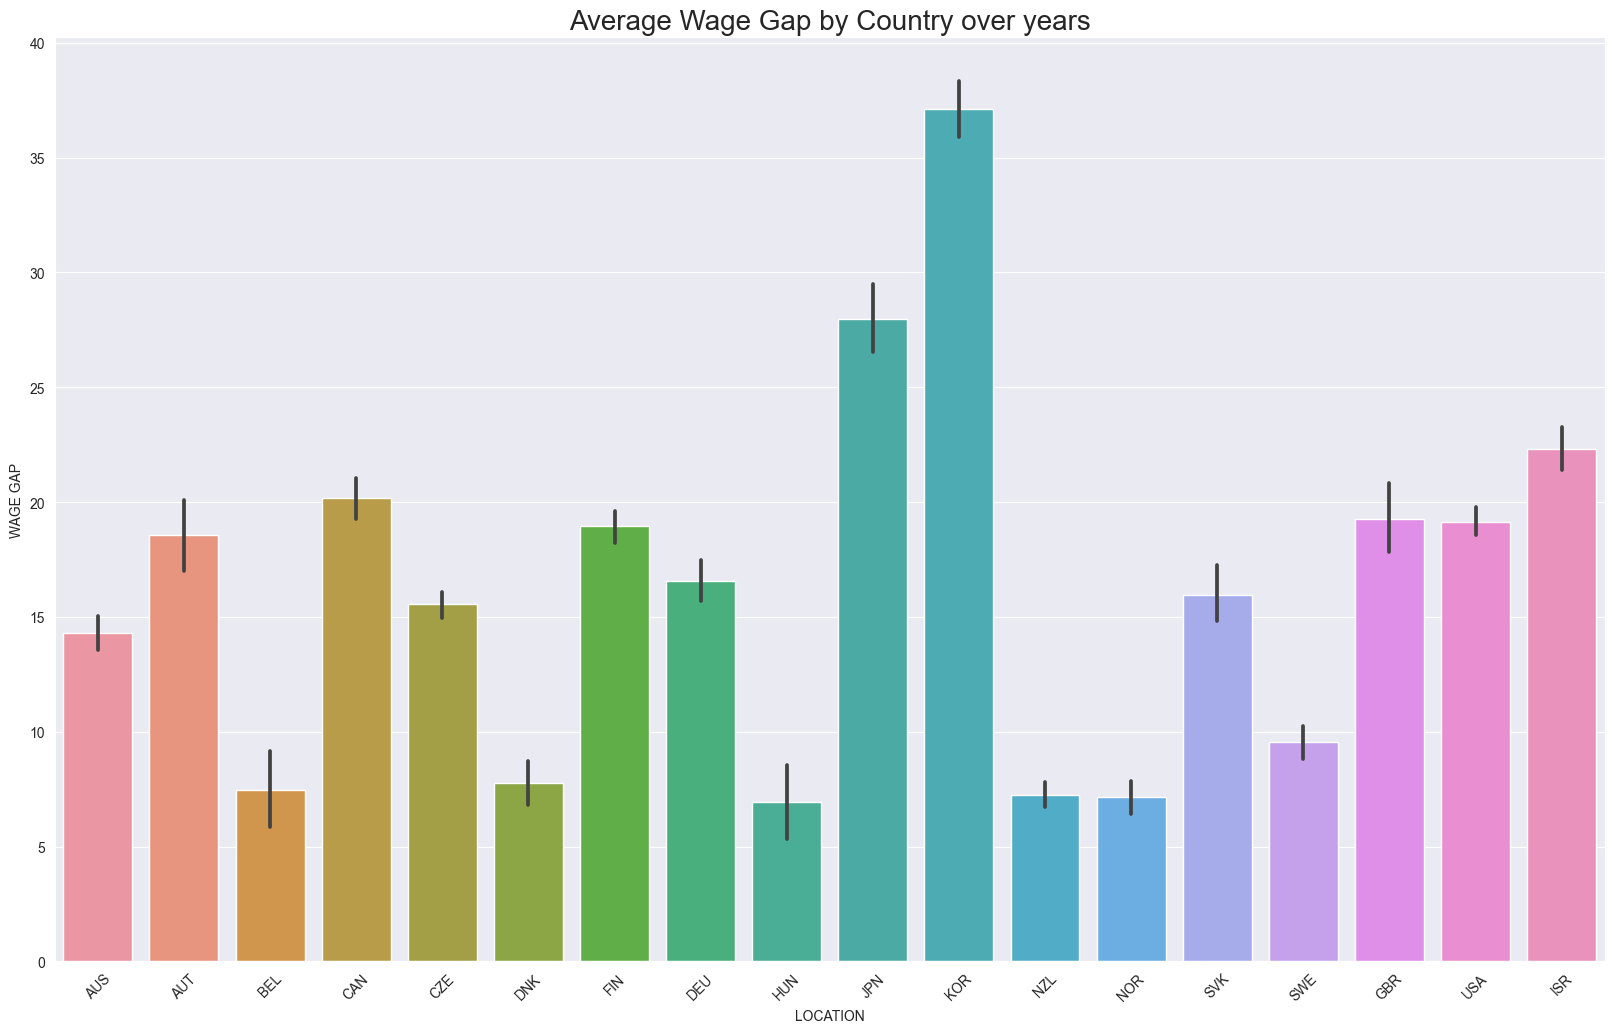

In [70]:
plt.figure(figsize=(20, 12))
sns.barplot(data=selected_wage_gap_df, x="LOCATION", y="WAGE GAP")
plt.xticks(rotation=45)

plt.title("Average Wage Gap by Country over years", fontsize=20)

plt.show()

<Figure size 2000x2000 with 0 Axes>

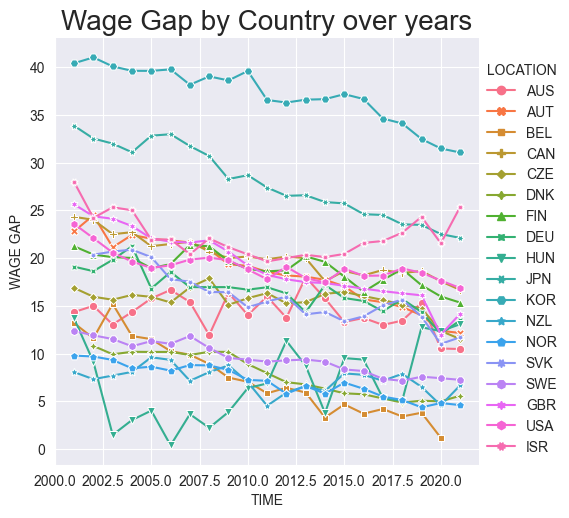

In [71]:
plt.figure(figsize=(20, 20))
sns.relplot(data=selected_wage_gap_df,
            x="TIME", y="WAGE GAP", kind="line",
            style="LOCATION", hue="LOCATION",
            markers=True,
            dashes=False
)

plt.title("Wage Gap by Country over years", fontsize=20)
plt.show()

It is also interesting to see the changes over the years.

In [72]:
wage_gap_pivot = selected_wage_gap_df.pivot_table(index="LOCATION", columns="TIME", values="WAGE GAP", fill_value=0)
latest_year = selected_wage_gap_df["TIME"].max()
five_years_ago = latest_year - 5
ten_years_ago = latest_year - 10
twenty_years_ago = latest_year - 20
change_in_wage_gap = pd.DataFrame([])
change_in_wage_gap["5yrs"] = wage_gap_pivot[latest_year] - wage_gap_pivot[five_years_ago]
change_in_wage_gap["10yrs"] = wage_gap_pivot[latest_year] - wage_gap_pivot[ten_years_ago]
change_in_wage_gap["20yrs"] = wage_gap_pivot[latest_year] - wage_gap_pivot[twenty_years_ago]
change_in_wage_gap = change_in_wage_gap.reset_index()
change_in_wage_gap

LOCATION      5yrs     10yrs      20yrs
0       AUS -3.258187 -5.496141  -3.871860
1       AUT -3.513691 -6.393346 -10.644609
2       BEL -3.701299 -5.838109 -13.186813
3       CAN -1.525466 -3.208333  -7.657912
4       CZE -4.504683 -4.810908  -5.357873
5       DEU -2.035665 -3.469390  -5.625597
6       DNK -0.156545 -2.371115   5.576083
7       FIN -1.131471 -3.266830  -5.898304
8       GBR -2.627181 -4.076649 -11.470290
9       HUN  3.712297  6.212709  -0.613167
10      ISR  3.764182  5.697847  -2.617205
11      JPN -2.487523 -5.281599 -11.750905
12      KOR -5.601827 -5.499390  -9.351301
13      NOR -1.704827 -2.543333  -5.186109
14      NZL -1.102564  2.133333  -1.389599
15      SVK -2.198811 -3.749485  11.700371
16      SWE -0.923558 -1.911132  -5.129861
17      USA -1.277901 -0.924287  -6.717915

In [73]:
melted_change_in_wage_gap = pd.melt(change_in_wage_gap, id_vars="LOCATION", value_vars=["5yrs","10yrs","20yrs"], var_name='YEARS', value_name='CHANGES')
melted_change_in_wage_gap

LOCATION  YEARS    CHANGES
0       AUS   5yrs  -3.258187
1       AUT   5yrs  -3.513691
2       BEL   5yrs  -3.701299
3       CAN   5yrs  -1.525466
4       CZE   5yrs  -4.504683
5       DEU   5yrs  -2.035665
6       DNK   5yrs  -0.156545
7       FIN   5yrs  -1.131471
8       GBR   5yrs  -2.627181
9       HUN   5yrs   3.712297
10      ISR   5yrs   3.764182
11      JPN   5yrs  -2.487523
12      KOR   5yrs  -5.601827
13      NOR   5yrs  -1.704827
14      NZL   5yrs  -1.102564
15      SVK   5yrs  -2.198811
16      SWE   5yrs  -0.923558
17      USA   5yrs  -1.277901
18      AUS  10yrs  -5.496141
19      AUT  10yrs  -6.393346
20      BEL  10yrs  -5.838109
21      CAN  10yrs  -3.208333
22      CZE  10yrs  -4.810908
23      DEU  10yrs  -3.469390
24      DNK  10yrs  -2.371115
25      FIN  10yrs  -3.266830
26      GBR  10yrs  -4.076649
27      HUN  10yrs   6.212709
28      ISR  10yrs   5.697847
29      JPN  10yrs  -5.281599
30      KOR  10yrs  -5.499390
31      NOR  10yrs  -2.543333
32      NZL  10yrs   2.133333
33      SVK  10yrs  -3.749485
34      SWE  10yrs  -1.911132
35      USA  10yrs  -0.924287
36      AUS  20yrs  -3.871860
37      AUT  20yrs -10.644609
38      BEL  20yrs -13.186813
39      CAN  20yrs  -7.657912
40      CZE  20yrs  -5.357873
41      DEU  20yrs  -5.625597
42      DNK  20yrs   5.576083
43      FIN  20yrs  -5.898304
44      GBR  20yrs -11.470290
45      HUN  20yrs  -0.613167
46      ISR  20yrs  -2.617205
47      JPN  20yrs -11.750905
48      KOR  20yrs  -9.351301
49      NOR  20yrs  -5.186109
50      NZL  20yrs  -1.389599
51      SVK  20yrs  11.700371
52      SWE  20yrs  -5.129861
53      USA  20yrs  -6.717915

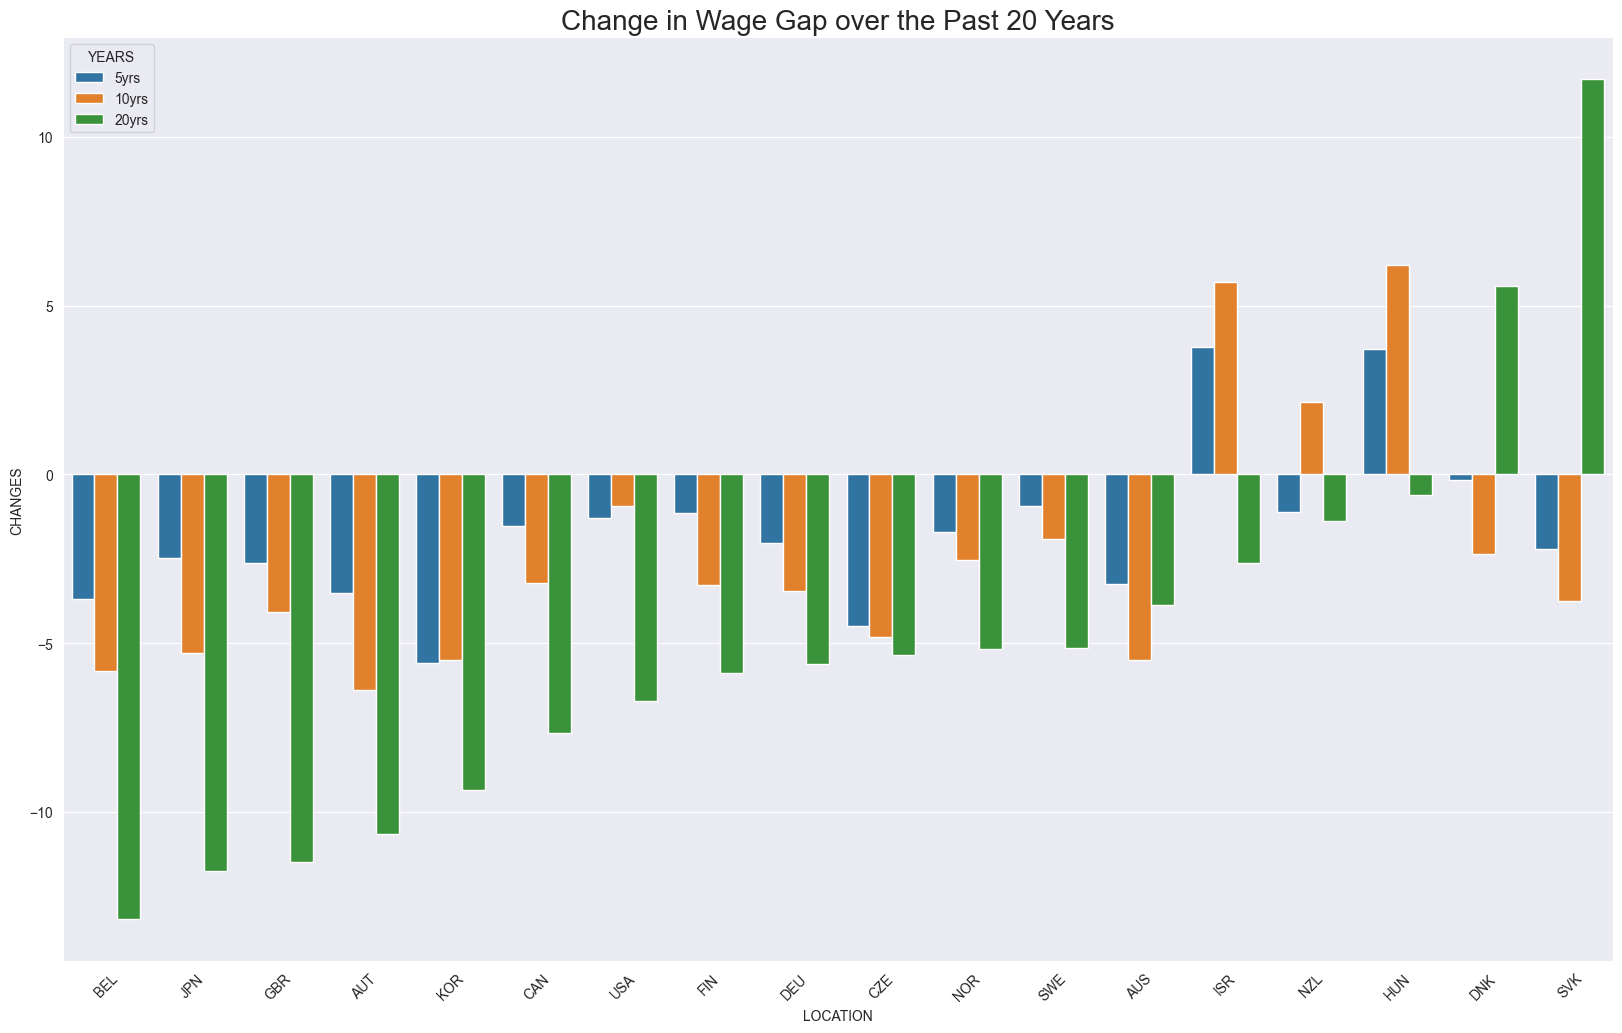

In [74]:
plt.figure(figsize=(20, 12))

sorted_df = melted_change_in_wage_gap[melted_change_in_wage_gap['YEARS'] == '20yrs'].sort_values('CHANGES')

sns.barplot(data=melted_change_in_wage_gap, x="LOCATION", y="CHANGES", hue="YEARS",
            order=sorted_df["LOCATION"])
plt.xticks(rotation=45)

plt.title("Change in Wage Gap over the Past 20 Years", fontsize=20)

plt.show()

Now let's a look at the graduate field dataset.

In [75]:
min_year = graduate_df["Year"].min()
min_year

1998

<Figure size 2000x2000 with 0 Axes>

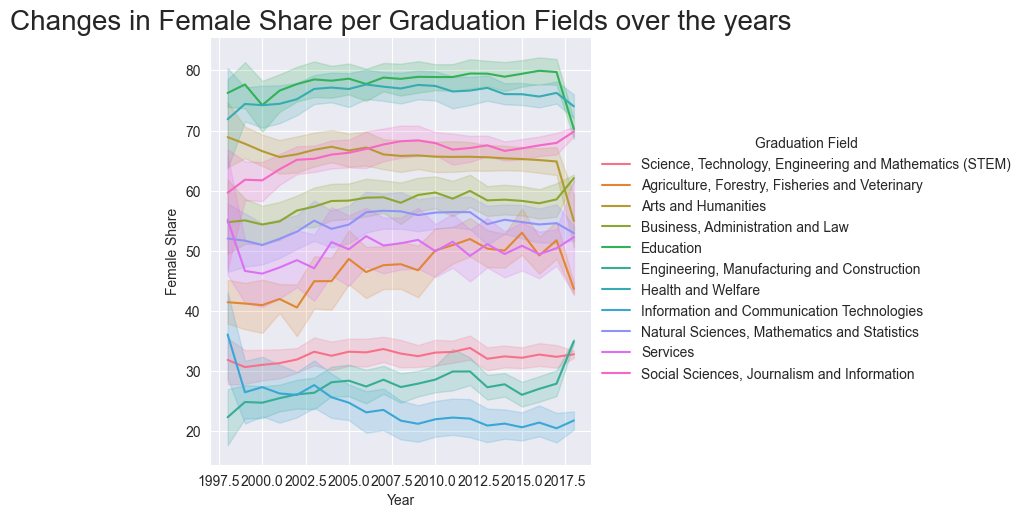

In [76]:
plt.figure(figsize=(20, 20))
sns.relplot(data=graduate_df,
            x="Year", y="Female Share", kind="line",
            hue="Graduation Field",
            markers=True,
            dashes=False
)

plt.title("Changes in Female Share per Graduation Fields over the years", fontsize=20)
plt.show()

In [77]:
early_year = (graduate_df["Year"] >= min_year) & graduate_df["Year"] < (min_year + 5)
early_year_field_distribution = graduate_df[early_year].groupby("Graduation Field").agg({"Female Share":'mean'}).sort_values("Female Share", ascending=False)
early_year_field_distribution = early_year_field_distribution.reset_index()
early_year_field_distribution

Graduation Field  Female Share
0                                           Education     78.484574
1                                  Health and Welfare     76.339849
2         Social Sciences, Journalism and Information     66.375333
3                                 Arts and Humanities     65.974748
4                    Business, Administration and Law     57.956772
5        Natural Sciences, Mathematics and Statistics     54.695380
6                                            Services     49.945203
7     Agriculture, Forestry, Fisheries and Veterinary     47.530275
8   Science, Technology, Engineering and Mathemati...     32.542228
9         Engineering, Manufacturing and Construction     27.414785
10         Information and Communication Technologies     23.326037

Let's divide the graduation fields into three groups of "Traditional Groups of Fields":
    - with Female Majority
    - with Male Majority
    - with No Significant Majority

In [78]:
def categorize_female_share(share):
    if share > 66:
        return 'with Female Majority'
    elif share < 33:
        return 'with Male Majority'
    else:
        return 'with No Significant Majority'

early_year_field_distribution['Traditional Groups of Fields'] = early_year_field_distribution['Female Share'].apply(categorize_female_share)
early_year_field_distribution

Graduation Field  Female Share  \
0                                           Education     78.484574   
1                                  Health and Welfare     76.339849   
2         Social Sciences, Journalism and Information     66.375333   
3                                 Arts and Humanities     65.974748   
4                    Business, Administration and Law     57.956772   
5        Natural Sciences, Mathematics and Statistics     54.695380   
6                                            Services     49.945203   
7     Agriculture, Forestry, Fisheries and Veterinary     47.530275   
8   Science, Technology, Engineering and Mathemati...     32.542228   
9         Engineering, Manufacturing and Construction     27.414785   
10         Information and Communication Technologies     23.326037   

    Traditional Groups of Fields  
0           with Female Majority  
1           with Female Majority  
2           with Female Majority  
3   with No Significant Majority  
4   with No Significant Majority  
5   with No Significant Majority  
6   with No Significant Majority  
7   with No Significant Majority  
8             with Male Majority  
9             with Male Majority  
10            with Male Majority

In [79]:
trad_group_fields = early_year_field_distribution.drop("Female Share", axis=1)
trad_group_fields

Graduation Field  \
0                                           Education   
1                                  Health and Welfare   
2         Social Sciences, Journalism and Information   
3                                 Arts and Humanities   
4                    Business, Administration and Law   
5        Natural Sciences, Mathematics and Statistics   
6                                            Services   
7     Agriculture, Forestry, Fisheries and Veterinary   
8   Science, Technology, Engineering and Mathemati...   
9         Engineering, Manufacturing and Construction   
10         Information and Communication Technologies   

    Traditional Groups of Fields  
0           with Female Majority  
1           with Female Majority  
2           with Female Majority  
3   with No Significant Majority  
4   with No Significant Majority  
5   with No Significant Majority  
6   with No Significant Majority  
7   with No Significant Majority  
8             with Male Majority  
9             with Male Majority  
10            with Male Majority

In [80]:
selected_countries = selected_wage_gap_df["LOCATION"].unique()
selected_graduate_df = graduate_df[graduate_df["Country Code"].isin(selected_countries)]

In [81]:
selected_graduate_df = selected_graduate_df[selected_graduate_df["Year"] >= selected_years]
selected_graduate_df

Country Code Country Name  \
659           AUS    Australia   
660           AUS    Australia   
661           AUS    Australia   
662           AUS    Australia   
663           BEL      Belgium   
...           ...          ...   
6799          SWE       Sweden   
6800          SWE       Sweden   
6801          SWE       Sweden   
6802          SWE       Sweden   
6803          SWE       Sweden   

                                       Graduation Field  Year  Female Share  
659     Agriculture, Forestry, Fisheries and Veterinary  2001      40.45496  
660                                 Arts and Humanities  2001      66.34817  
661                                           Education  2001      73.91716  
662                                  Health and Welfare  2001      77.53205  
663   Science, Technology, Engineering and Mathemati...  2001      24.31775  
...                                                 ...   ...           ...  
6799                                 Health and Welfare  2017      80.79806  
6800         Information and Communication Technologies  2017      30.23847  
6801       Natural Sciences, Mathematics and Statistics  2017      52.02827  
6802                                           Services  2017      63.97327  
6803        Social Sciences, Journalism and Information  2017      66.39936  

[2213 rows x 5 columns]

In [82]:
graduate_df_unique_count = selected_graduate_df.groupby(["Country Code"]).agg({"Year":'nunique'})
graduate_df_unique_count

Year
Country Code      
AUS             14
AUT              4
BEL             13
CAN              9
CZE             17
DEU              5
DNK             17
FIN             15
GBR             16
HUN             16
ISR              1
JPN              5
KOR             16
NOR             16
NZL              6
SVK             16
SWE             16
USA              8

In [83]:
selected_countries = graduate_df_unique_count[graduate_df_unique_count["Year"] > 5].index
selected_wage_gap_df = selected_wage_gap_df[selected_wage_gap_df["LOCATION"].isin(selected_countries)]
selected_graduate_df = selected_graduate_df[selected_graduate_df["Country Code"].isin(selected_countries)]

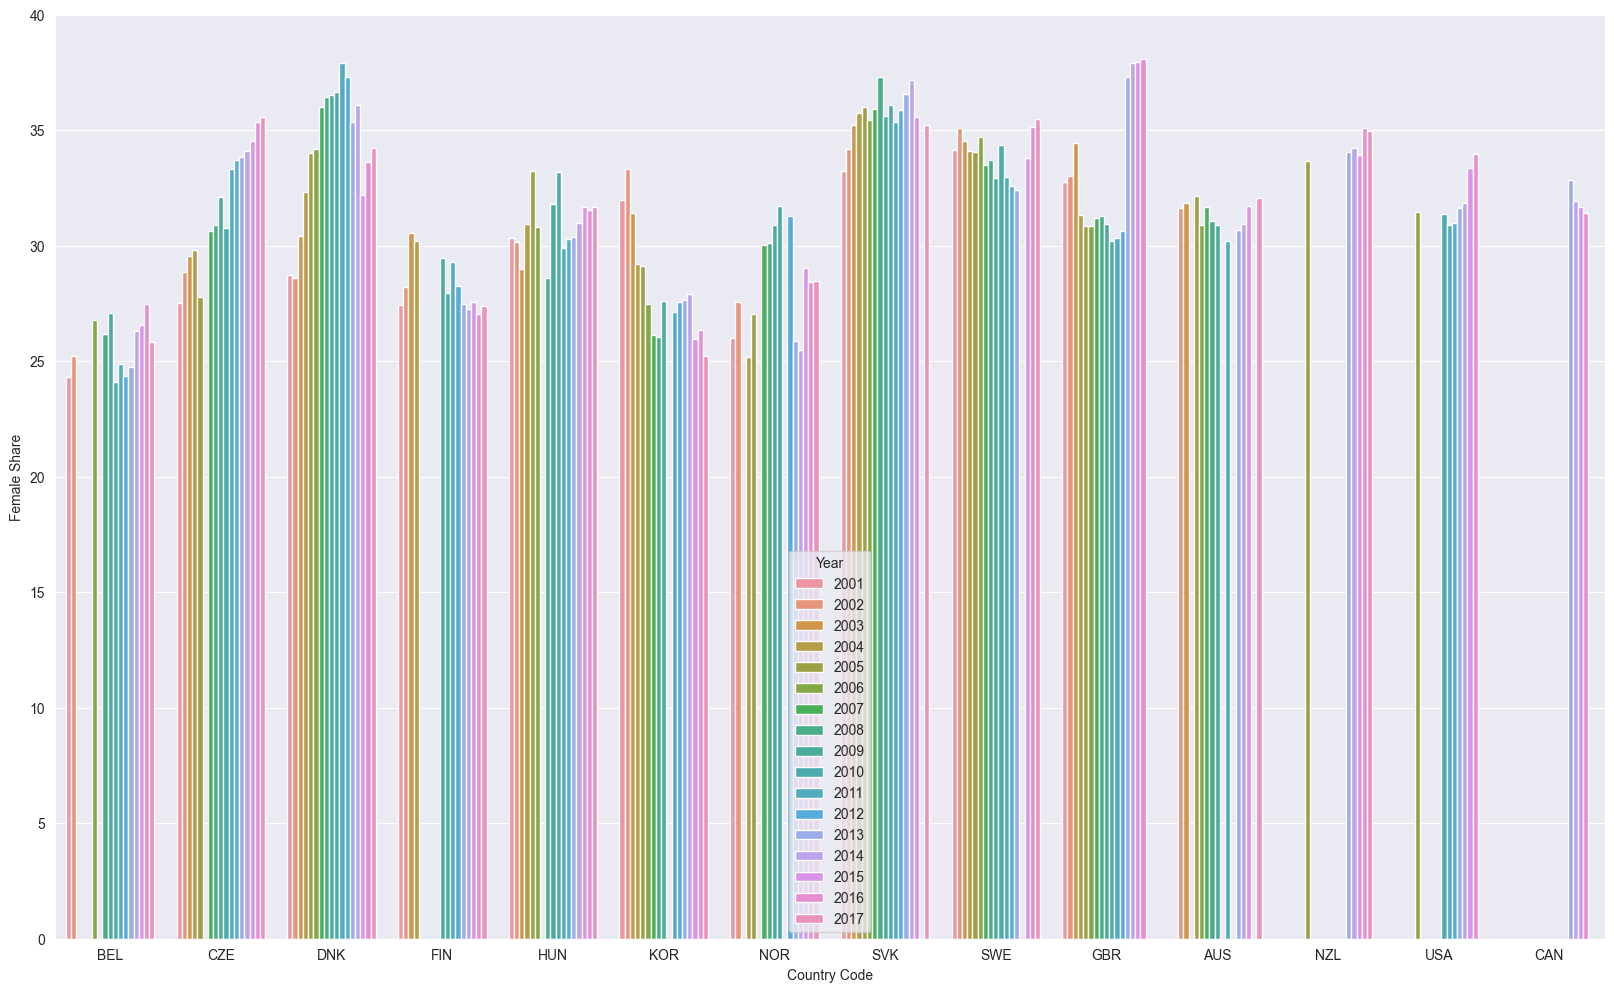

In [84]:
Test_field = "Science, Technology, Engineering and Mathematics (STEM)"
selected_STEM_trend_df = selected_graduate_df[selected_graduate_df["Graduation Field"] == Test_field]

plt.figure(figsize=(20, 12))
sns.barplot(data=selected_STEM_trend_df, x="Country Code", y="Female Share", hue="Year")
plt.show()

In [85]:
selected_wage_gap_df

LOCATION  TIME   WAGE GAP
25       AUS  2001  14.342105
26       AUS  2002  15.000000
27       AUS  2003  13.043478
28       AUS  2004  14.352941
29       AUS  2005  15.777778
..       ...   ...        ...
672      USA  2017  18.172157
673      USA  2018  18.910586
674      USA  2019  18.470705
675      USA  2020  17.652495
676      USA  2021  16.864175

[291 rows x 3 columns]

In [86]:
bel_wage_gap = selected_wage_gap_df[selected_wage_gap_df["LOCATION"] == "BEL"]
bel_wage_gap

LOCATION  TIME   WAGE GAP
71      BEL  2001  13.186813
72      BEL  2002  11.604714
73      BEL  2003  15.205184
74      BEL  2004  11.832061
75      BEL  2005  11.511093
76      BEL  2006  10.253268
77      BEL  2007   9.873618
78      BEL  2008   8.915754
79      BEL  2009   7.480461
80      BEL  2010   7.043796
81      BEL  2011   5.838109
82      BEL  2012   6.411150
83      BEL  2013   5.912863
84      BEL  2014   3.298900
85      BEL  2015   4.672000
86      BEL  2016   3.701299
87      BEL  2017   4.190296
88      BEL  2018   3.408757
89      BEL  2019   3.798186
90      BEL  2020   1.173184

In [87]:
bel_graduate = selected_graduate_df[selected_graduate_df["Country Code"] == "BEL"]
bel_graduate

Country Code Country Name  \
663           BEL      Belgium   
664           BEL      Belgium   
665           BEL      Belgium   
666           BEL      Belgium   
667           BEL      Belgium   
...           ...          ...   
6482          BEL      Belgium   
6483          BEL      Belgium   
6484          BEL      Belgium   
6485          BEL      Belgium   
6486          BEL      Belgium   

                                       Graduation Field  Year  Female Share  
663   Science, Technology, Engineering and Mathemati...  2001      24.31775  
664     Agriculture, Forestry, Fisheries and Veterinary  2001      38.20225  
665                                 Arts and Humanities  2001      62.94026  
666                    Business, Administration and Law  2001      53.76975  
667                                           Education  2001      71.49321  
...                                                 ...   ...           ...  
6482                                 Health and Welfare  2017      75.63279  
6483         Information and Communication Technologies  2017       9.87884  
6484       Natural Sciences, Mathematics and Statistics  2017      41.40052  
6485                                           Services  2017      54.13386  
6486        Social Sciences, Journalism and Information  2017      70.33540  

[143 rows x 5 columns]

In [88]:
selected_wage_gap_df.describe()

TIME    WAGE GAP
count   291.000000  291.000000
mean   2011.034364   14.804678
std       6.011385    8.391742
min    2001.000000    0.384387
25%    2006.000000    8.308852
50%    2011.000000   14.352941
75%    2016.000000   18.832942
max    2021.000000   41.028513

In [89]:
selected_graduate_df["Non-Female Share"] = 100 - selected_graduate_df["Female Share"]
bel_graduate = selected_graduate_df[selected_graduate_df["Country Code"] == "BEL"]

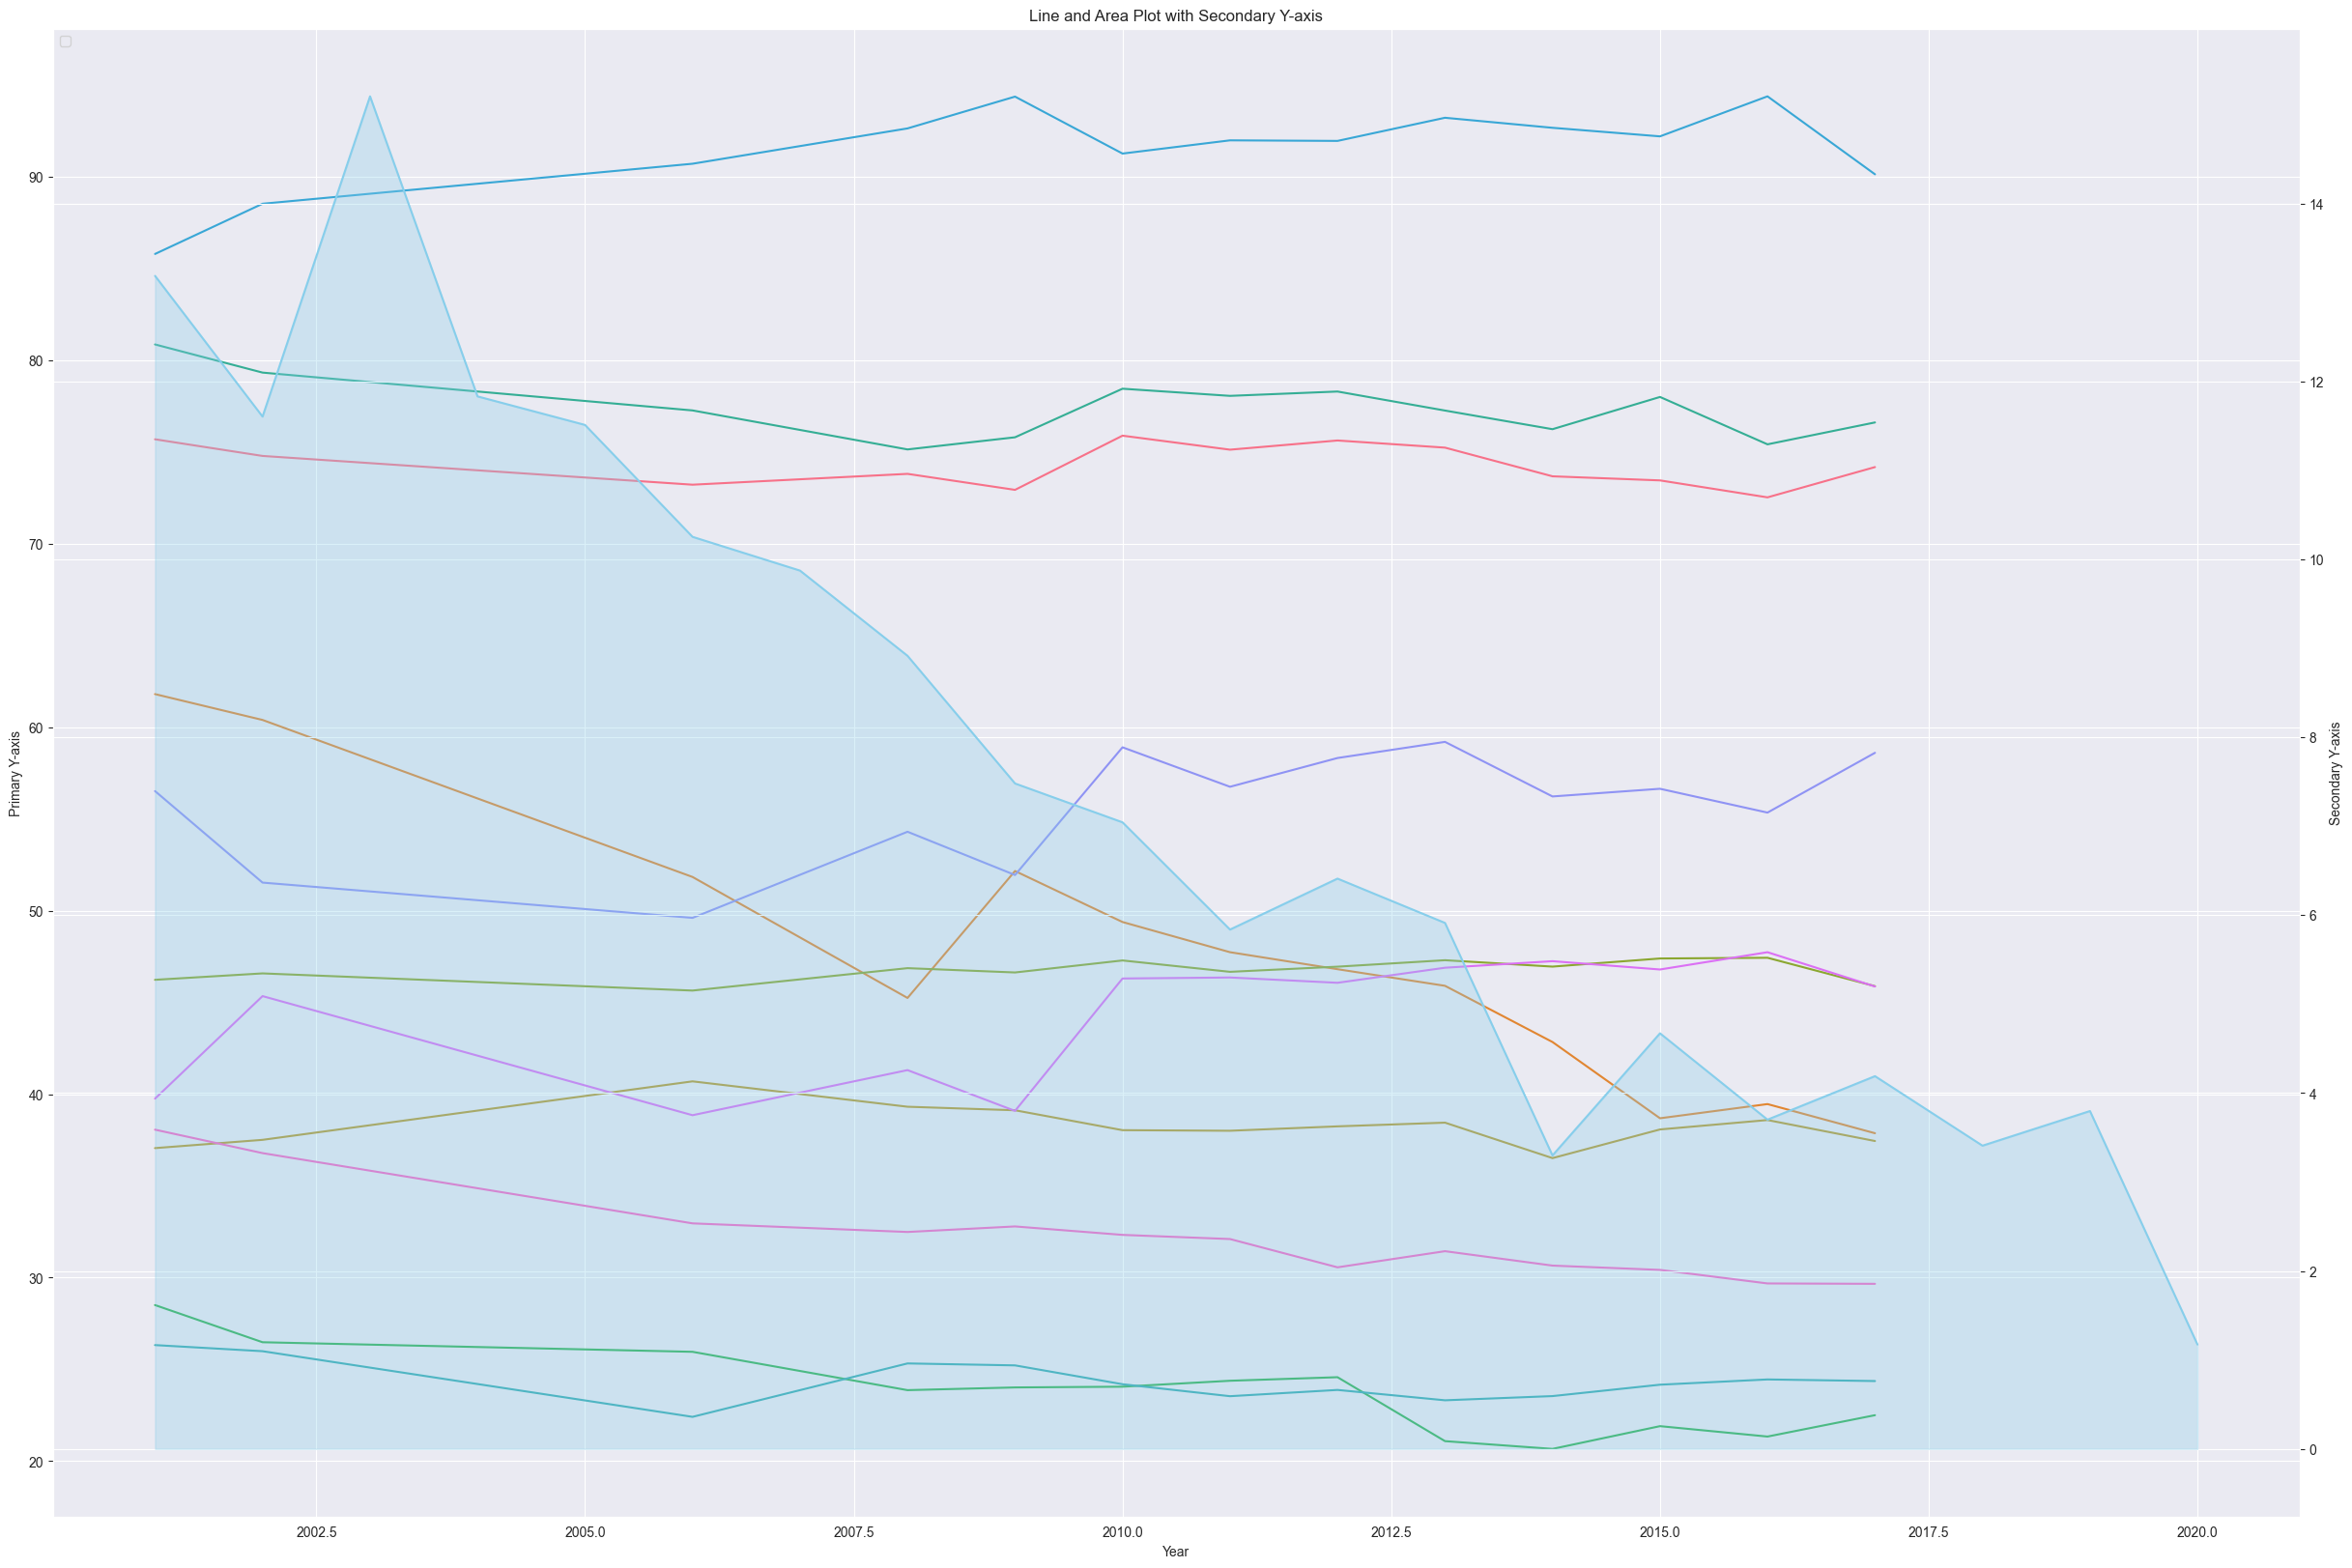

In [90]:

# Create a figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(30, 20))

# Create a line plot using Seaborn
sns.lineplot(
    data=bel_graduate,
    x="Year",
    y="Non-Female Share",
    hue="Graduation Field", ax=ax1, legend=False
)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the area on the secondary y-axis
area_plot = sns.lineplot(data=bel_wage_gap,
                         x="TIME",
                         y="WAGE GAP",
                         color='skyblue',
                         ax=ax2
                         )
area_plot.fill_between(data=bel_wage_gap,
                       x="TIME",
                       y1="WAGE GAP",
                       alpha=0.3,
                       color='skyblue')

# Set labels and title for both y-axes
ax1.set_ylabel('Primary Y-axis')
ax2.set_ylabel('Secondary Y-axis')

# Set a common title for both plots
plt.title('Line and Area Plot with Secondary Y-axis')

# Show legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


In [91]:
len(selected_countries)

14

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

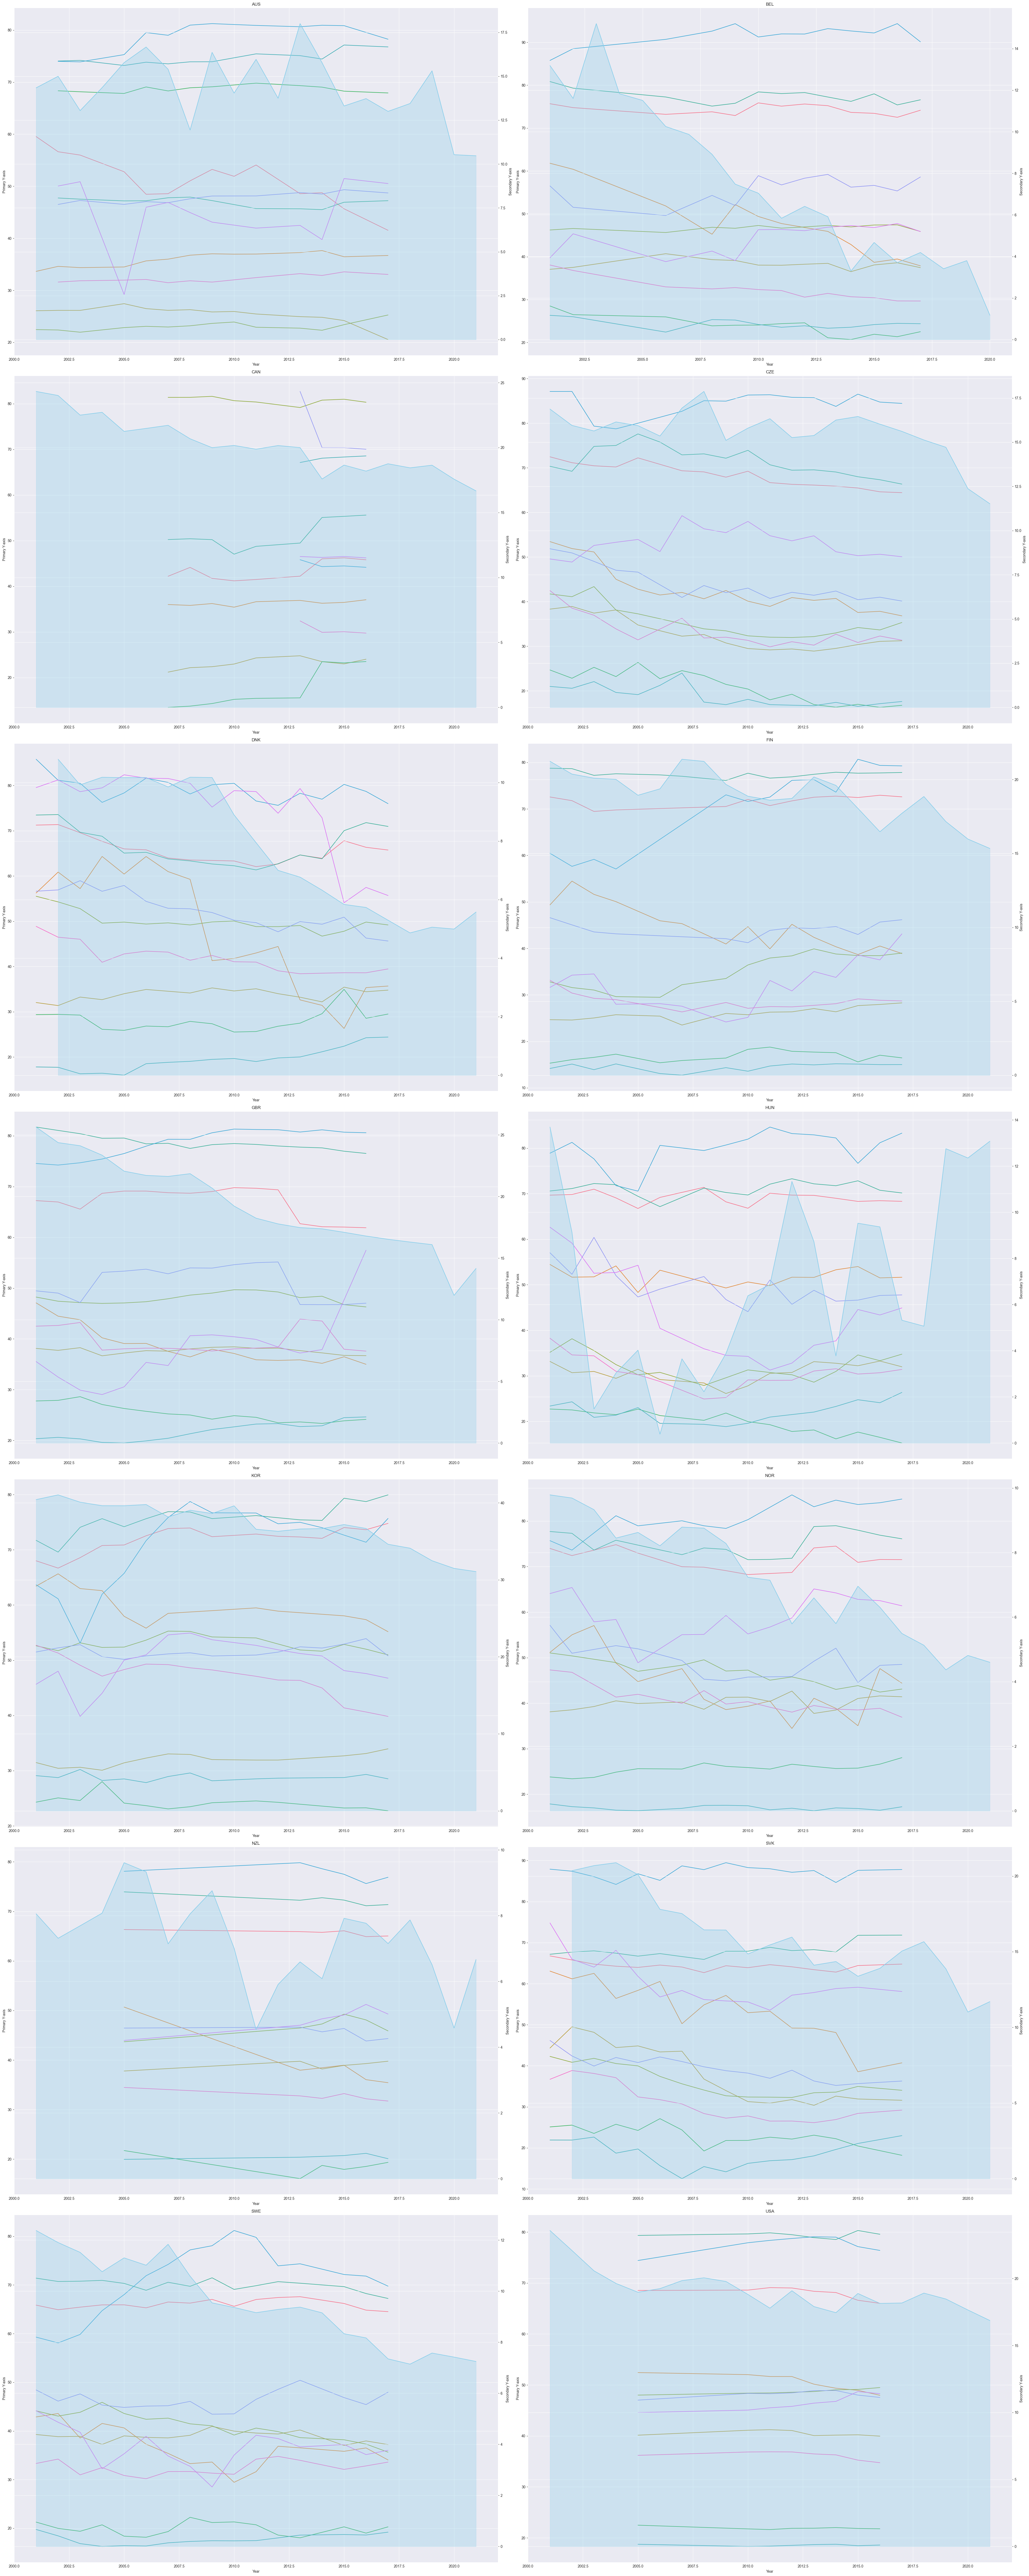

In [92]:
# Create a figure with 4 rows and 5 columns of subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(40, 100))

# Flatten the axes array for easier iteration
axes = axes.flatten()

country = iter(selected_countries)
# Loop through the axes and create line and area plots
for i, ax in enumerate(axes):
    country_i = next(country)
    ax.set_title(country_i)

    # Create a line plot using Seaborn
    line_plot = sns.lineplot(
        data=selected_graduate_df[selected_graduate_df["Country Code"] == country_i],
        x="Year",
        y="Non-Female Share",
        hue="Graduation Field", ax=ax
    )

    # Create a secondary y-axis
    ax2 = ax.twinx()

    # Plot the area on the secondary y-axis
    area_plot = sns.lineplot(data=selected_wage_gap_df[selected_wage_gap_df["LOCATION"] == country_i],
                             x="TIME",
                             y="WAGE GAP",
                             color='skyblue',
                             ax=ax2
                             )
    area_plot.fill_between(data=selected_wage_gap_df[selected_wage_gap_df["LOCATION"] == country_i],
                           x="TIME",
                           y1="WAGE GAP",
                           alpha=0.3,
                           color='skyblue')

    # Set labels and title for both y-axes
    ax.set_ylabel('Primary Y-axis')
    ax2.set_ylabel('Secondary Y-axis')

    # Set a common title for both plots

    # Remove legends to avoid duplication
    line_plot.legend().remove()
    area_plot.legend().remove()


# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [93]:
grouped_selected_graduate_df = selected_graduate_df.merge(trad_group_fields, on="Graduation Field")
grouped_selected_graduate_df.head()

Country Code Country Name                                 Graduation Field  \
0          AUS    Australia  Agriculture, Forestry, Fisheries and Veterinary   
1          BEL      Belgium  Agriculture, Forestry, Fisheries and Veterinary   
2          CZE      Czechia  Agriculture, Forestry, Fisheries and Veterinary   
3          DNK      Denmark  Agriculture, Forestry, Fisheries and Veterinary   
4          FIN      Finland  Agriculture, Forestry, Fisheries and Veterinary   

   Year  Female Share  Non-Female Share  Traditional Groups of Fields  
0  2001      40.45496          59.54504  with No Significant Majority  
1  2001      38.20225          61.79775  with No Significant Majority  
2  2001      46.54169          53.45831  with No Significant Majority  
3  2001      43.75000          56.25000  with No Significant Majority  
4  2001      50.63437          49.36563  with No Significant Majority

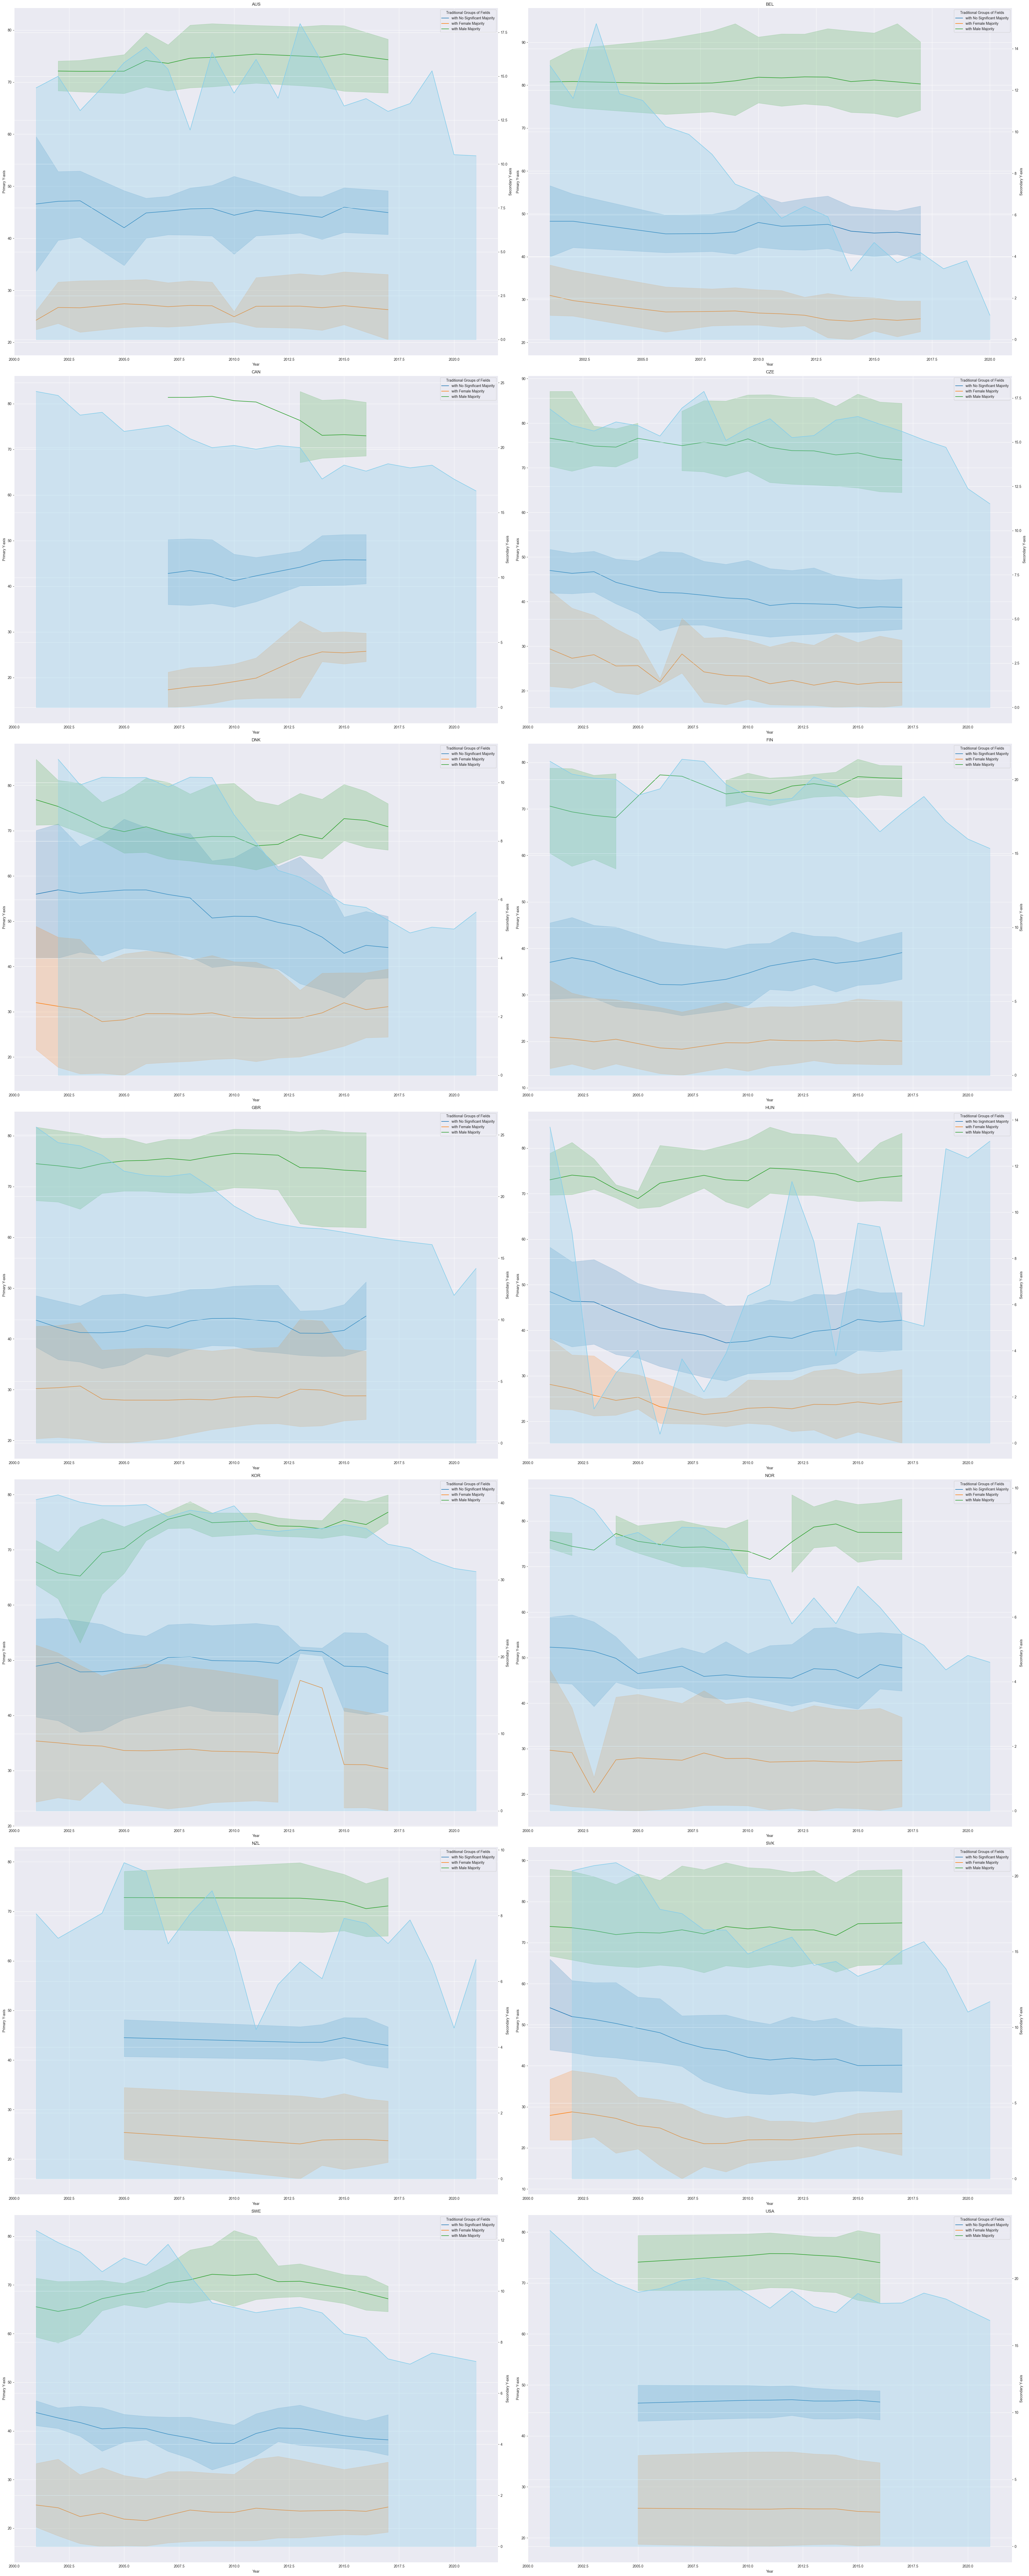

In [94]:
# Create a figure with 4 rows and 5 columns of subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(40, 100))

# Flatten the axes array for easier iteration
axes = axes.flatten()

country = iter(selected_countries)
# Loop through the axes and create line and area plots
for i, ax in enumerate(axes):
    country_i = next(country)
    ax.set_title(country_i)

    # Create a line plot using Seaborn
    line_plot = sns.lineplot(
        data=grouped_selected_graduate_df[grouped_selected_graduate_df["Country Code"] == country_i],
        x="Year",
        y="Non-Female Share",
        hue="Traditional Groups of Fields", ax=ax
    )

    # Create a secondary y-axis
    ax2 = ax.twinx()

    # Plot the area on the secondary y-axis
    area_plot = sns.lineplot(data=selected_wage_gap_df[selected_wage_gap_df["LOCATION"] == country_i],
                             x="TIME",
                             y="WAGE GAP",
                             color='skyblue',
                             ax=ax2
                             )
    area_plot.fill_between(data=selected_wage_gap_df[selected_wage_gap_df["LOCATION"] == country_i],
                           x="TIME",
                           y1="WAGE GAP",
                           alpha=0.3,
                           color='skyblue')

    # Set labels and title for both y-axes
    ax.set_ylabel('Primary Y-axis')
    ax2.set_ylabel('Secondary Y-axis')

    # Set a common title for both plots

    # Remove legends to avoid duplication
    # line_plot.legend().remove()
    # area_plot.legend().remove()


# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()